In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import seaborn
seaborn.set()

Unnamed: 0                                                               17
mean_fit_time                                                      8.011084
std_fit_time                                                       0.024499
mean_score_time                                                    0.494874
std_score_time                                                     0.039658
param_max_features                                                       25
param_min_samples_leaf                                                    2
param_n_estimators                                                      300
params                    {'max_features': 25, 'min_samples_leaf': 2, 'n...
split0_test_score                                                  -0.05145
split1_test_score                                                 -0.038538
split2_test_score                                                 -0.038217
split3_test_score                                                 -0.056456
split4_test_

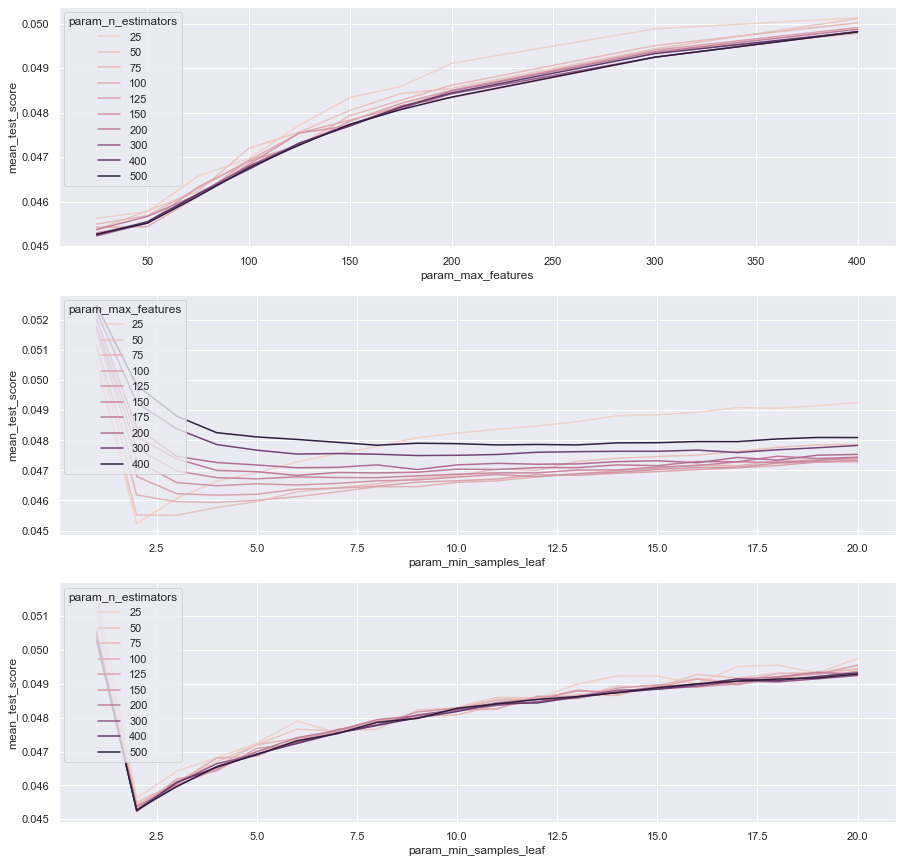

In [92]:
df = pd.read_csv("results/forest_CV2.csv")
best_forest = df.rank_test_score.argmin()
# print(df.loc[best_forest])
grouped = df.groupby(["param_max_features", "param_min_samples_leaf", "param_n_estimators"]).agg({'mean_test_score': lambda x: -x.mean(), 'std_test_score': lambda x: x.mean()}).reset_index()

fig, ax = plt.subplots(3,1, figsize = (15, 15))
seaborn.lineplot(data = grouped[grouped.param_min_samples_leaf == 2 ],
                 x = 'param_max_features',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                #  style = 'param_min_samples_leaf',
                 ax = ax[0])


seaborn.lineplot(data = grouped[grouped.param_n_estimators == 300 ],
                 x = 'param_min_samples_leaf',
                 y = 'mean_test_score',
                 hue = 'param_max_features',
                 legend = 'full',
                 ax = ax[1])


seaborn.lineplot(data = grouped[grouped.param_max_features == 25 ],
                 x = 'param_min_samples_leaf',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                 ax = ax[2])

df.loc[df.rank_test_score.argmin()]

Unnamed: 0                                                           341
mean_fit_time                                                  36.146475
std_fit_time                                                    0.170245
mean_score_time                                                 0.499031
std_score_time                                                  0.019117
param_learning_rate                                             0.043714
param_max_depth                                                        7
param_max_features                                                   100
param_n_estimators                                                   700
params                 {'learning_rate': 0.04371428571428571, 'max_de...
split0_test_score                                              -0.050241
split1_test_score                                              -0.038226
split2_test_score                                              -0.038479
split3_test_score                                  

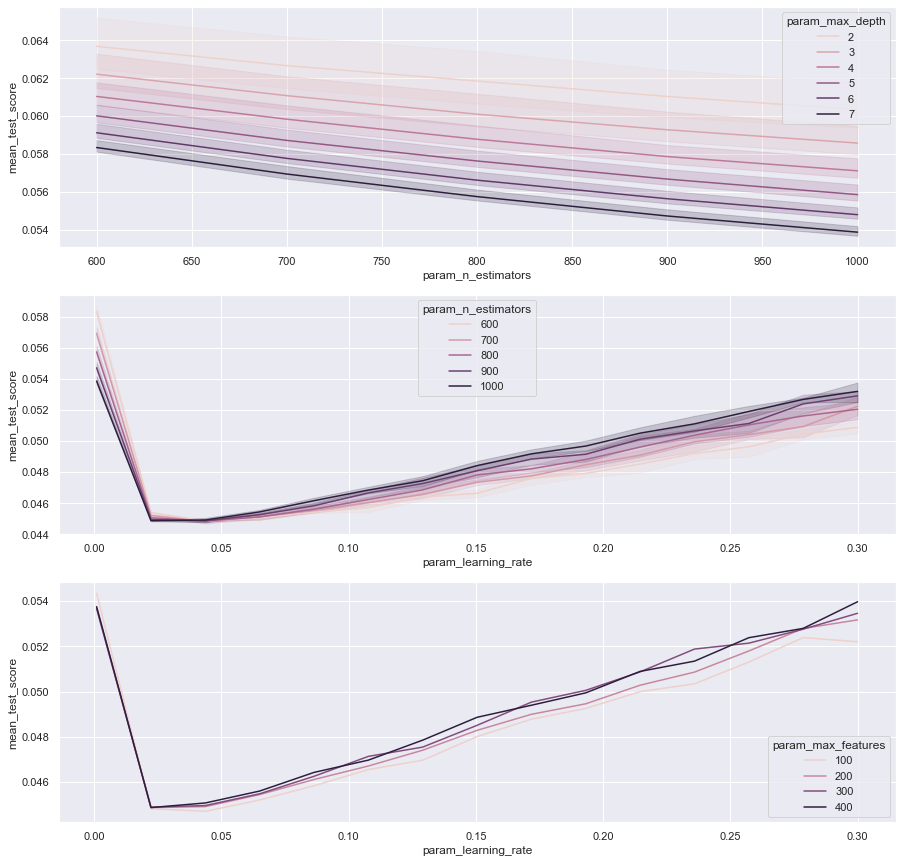

In [87]:
df = pd.read_csv("results/booster_CV3.csv")
df
grouped = df.groupby(["param_learning_rate", "param_max_depth", "param_max_features", "param_n_estimators"]).agg({'mean_test_score': lambda x: -x.mean(), 'std_test_score': lambda x: x.mean()}).reset_index()

fig, ax = plt.subplots(3,1, figsize = (15, 15))
seaborn.lineplot(data = grouped[grouped.param_learning_rate == 0.001 ],
                 x = 'param_n_estimators',
                 y = 'mean_test_score',
                 hue = 'param_max_depth',
                 legend = 'full',
                #  style = 'param_min_samples_leaf',
                 ax = ax[0])


seaborn.lineplot(data = grouped[grouped.param_max_depth == 7 ],
                 x = 'param_learning_rate',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                 ax = ax[1])


seaborn.lineplot(data = grouped[(grouped.param_n_estimators == 1000) * grouped.param_max_depth == 7 ],
                 x = 'param_learning_rate',
                 y = 'mean_test_score',
                 hue = 'param_max_features',
                 legend = 'full',
                 ax = ax[2])

df.loc[df.rank_test_score.argmin()]

In [88]:
np.sqrt(0.044685)

0.2113882683594338

<AxesSubplot:xlabel='param_learning_rate', ylabel='mean_test_score'>

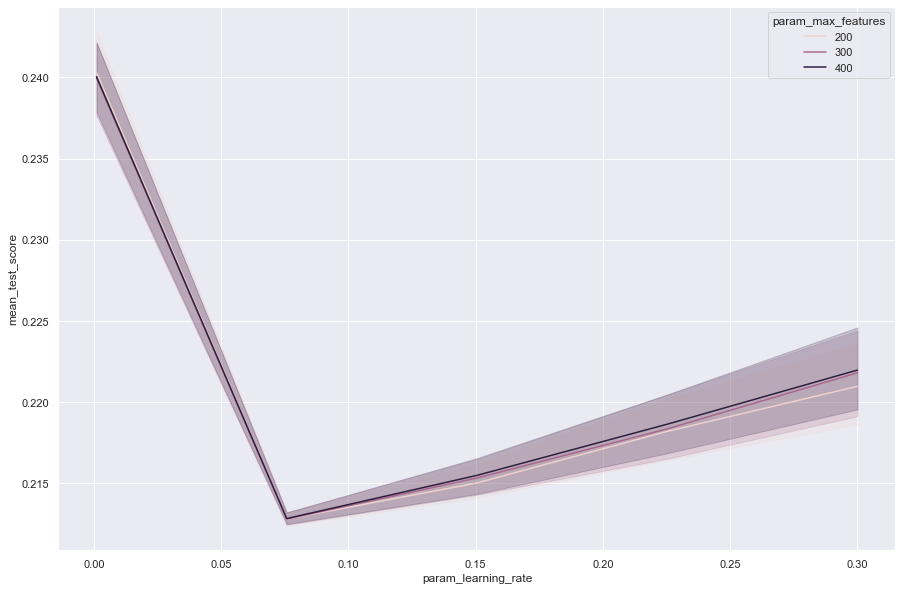

In [65]:
df_ = pd.read_csv("booster_CV.csv")
df3 = df_.groupby(["param_max_features", "param_learning_rate", "param_max_depth", "param_n_estimators"]).agg({"mean_test_score": 'mean'}).reset_index()
df3.mean_test_score = np.sqrt(-df3.mean_test_score)
fig ,ax = plt.subplots(figsize = (15,10))
seaborn.lineplot(data = df3, x = 'param_learning_rate', y = 'mean_test_score', hue = 'param_max_features')


In [70]:
df_

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,28.537781,0.224936,0.323301,0.011906,0.001,3,200,600,"{'learning_rate': 0.001, 'max_depth': 3, 'max_...",-0.075703,-0.059744,-0.057160,-0.060469,-0.056965,-0.062008,0.006985,225
1,1,37.679086,0.190247,0.354837,0.019129,0.001,3,200,800,"{'learning_rate': 0.001, 'max_depth': 3, 'max_...",-0.072572,-0.056841,-0.054575,-0.060082,-0.055158,-0.059846,0.006645,219
2,2,46.882613,0.429411,0.389681,0.026886,0.001,3,200,1000,"{'learning_rate': 0.001, 'max_depth': 3, 'max_...",-0.070230,-0.054700,-0.052824,-0.059899,-0.053744,-0.058279,0.006459,207
3,3,39.468458,0.256901,0.303822,0.017124,0.001,3,300,600,"{'learning_rate': 0.001, 'max_depth': 3, 'max_...",-0.075043,-0.059044,-0.056592,-0.060418,-0.056621,-0.061544,0.006907,224
4,4,52.710617,0.757688,0.341550,0.030699,0.001,3,300,800,"{'learning_rate': 0.001, 'max_depth': 3, 'max_...",-0.072059,-0.056295,-0.054092,-0.060136,-0.054849,-0.059486,0.006622,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220,106.494736,1.367653,0.557786,0.031375,0.300,7,300,800,"{'learning_rate': 0.3, 'max_depth': 7, 'max_fe...",-0.063116,-0.045686,-0.043901,-0.066711,-0.047632,-0.053409,0.009535,179
221,221,133.480483,2.153167,0.683741,0.068089,0.300,7,300,1000,"{'learning_rate': 0.3, 'max_depth': 7, 'max_fe...",-0.062152,-0.046408,-0.044389,-0.065515,-0.047494,-0.053191,0.008810,177
222,222,103.913156,1.252782,0.452501,0.038498,0.300,7,400,600,"{'learning_rate': 0.3, 'max_depth': 7, 'max_fe...",-0.059742,-0.045184,-0.043400,-0.062069,-0.046518,-0.051382,0.007873,171
223,223,138.436751,0.674816,0.530433,0.044531,0.300,7,400,800,"{'learning_rate': 0.3, 'max_depth': 7, 'max_fe...",-0.060595,-0.045432,-0.043834,-0.063237,-0.047900,-0.052200,0.008082,175
